In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [76]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart.csv')

In [77]:
def remove_outliers_zscore(df, columns, threshold=8):
    z_scores = np.abs((df[columns] - df[columns].mean()) / df[columns].std())
    df_no_outliers = df[(z_scores < threshold).all(axis=1)]
    return df_no_outliers
data = remove_outliers_zscore(data, ['Age',	'RestingBP',	'Cholesterol',	'FastingBS',	'MaxHR',	'Oldpeak'])

In [78]:
ohe = OneHotEncoder(sparse=False)
one_hot_encoded = ohe.fit_transform(data[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']])
df_encoded = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']))
df_final = pd.concat([data, df_encoded], axis=1)
df_final = df_final.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina'], axis='columns')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [79]:
le = LabelEncoder()
df_final['ST_Slope_Labeled'] = le.fit_transform(df_final['ST_Slope']) 
df_final = df_final.drop(['ST_Slope'], axis='columns')

In [80]:
df_final = df_final.dropna()

In [81]:
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_final[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]) 
df_scaled = pd.DataFrame(scaled_values, columns=['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'])
df_final[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']] = df_scaled[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']]

In [82]:
X = df_final.drop('Age', axis='columns')
y = df_final['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [83]:
svm = SVC()
model = svm.fit(X_train, y_train)

In [84]:
model.score(X_test, y_test)

0.9945652173913043

In [85]:
pca = PCA(0.95)
pca_res = pca.fit_transform(X)

In [99]:
pd.DataFrame(pca_res)

,0,1,2,3,4,5,6,7,8,9,10
0,-2.066432,-0.490312,-0.706073,-0.101810,-0.218484,-0.325226,-0.563920,-0.473122,-0.210142,-0.245042,0.377364
1,-0.415380,-0.810257,-0.989780,-0.326882,-1.203139,0.670285,-0.372133,0.722078,0.652752,0.824057,0.166588
2,-0.583797,0.064889,0.184103,-1.538233,1.157967,0.738103,0.788049,-0.773589,-0.373100,-0.803317,0.654529
3,1.106350,-0.783134,0.693066,-0.745331,0.235329,0.296477,-0.429751,1.254526,0.004332,0.039232,-0.131722
4,-0.655653,0.082628,-0.645129,-1.497591,-0.181830,0.537945,-0.323506,-0.676847,0.484953,0.019708,-0.426768
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.403134,-0.101342,1.260606,0.366903,0.428614,0.429605,-0.336673,-0.620958,-0.022782,0.526709,0.382709
914,1.852888,-0.513740,-0.879651,1.890635,-0.262127,0.846442,-0.805869,-0.488338,-0.824918,0.180307,-0.147499
915,1.151578,0.081485,0.976486,-0.631437,-0.248105,-0.446833,-0.455125,0.148145,0.043967,0.011919,-0.080333
916,-1.699737,-0.275998,-0.303282,0.433649,-0.302084,-0.149580,0.812683,0.920852,0.053618,0.819886,0.543648


In [103]:
pca.n_features_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


18

In [87]:
X_train, X_test, y_train, y_test = train_test_split(pca_res, y, test_size=0.2, random_state=30)

In [88]:
svm = SVC()
model = svm.fit(X_train, y_train)

In [89]:
model.score(X_test, y_test)

0.9239130434782609

In [90]:
lr = LinearRegression()
model_2 = lr.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.6774464511153673

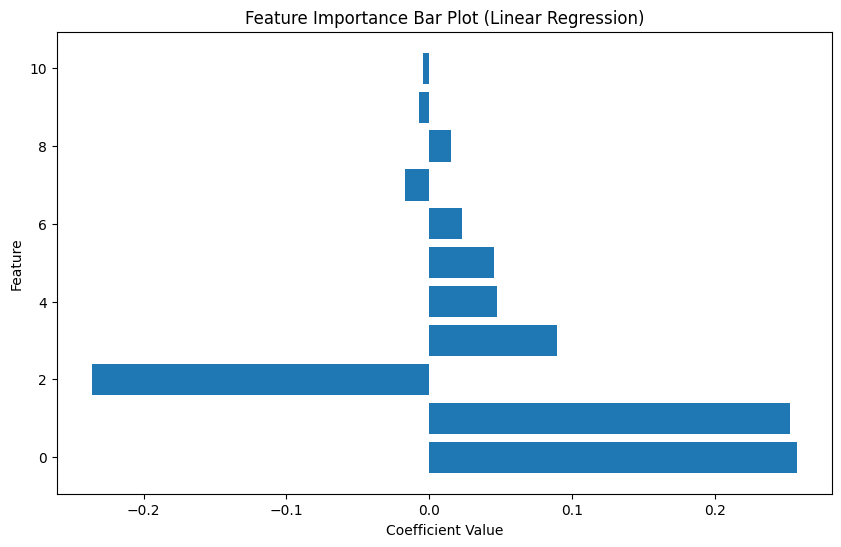

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already trained your Linear Regression model
feature_coefficients = model_2.coef_

# Assuming you have the names of the original features used in the PCA transformation
original_feature_names = [...]  # List of original feature names

# Sort the feature coefficients and corresponding feature names in descending order
sorted_indices = np.argsort(np.abs(feature_coefficients))[::-1]
sorted_feature_coefficients = feature_coefficients[sorted_indices]

# Plot the feature importance bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_coefficients)), sorted_feature_coefficients, align='center')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance Bar Plot (Linear Regression)')
plt.show()
